In [ ]:
import os
import io
import time
import logging
import random
#import pickle
import re
import sqlite3
import ipywidgets as widgets
import tkinter as tk
from tkinter import ttk, messagebox
from IPython.display import display, clear_output
#import seaborn as sns
#import matplotlib.pyplot as plt
from datetime import datetime, timedelta #, date
from typing import List, Dict, Any
import pandas as pd
import numpy as np
import gspread
from gspread_dataframe import set_with_dataframe
from sqlalchemy import create_engine
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from googleapiclient.errors import HttpError
from gspread_formatting import CellFormat, TextFormat, Color, Borders, Border, set_column_width, format_cell_range
from gspread_formatting import batch_updater
from googleapiclient.http import HttpRequest
#import ipywidgets as widgets
#import uuid
import tkinter as tk
from IPython.display import display, clear_output
import base64
from email.message import EmailMessage
from google_auth_oauthlib.flow import InstalledAppFlow
#import matplotlib.pyplot as plt
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials as UserCredentials
import base64
from email.message import EmailMessage

# DIRECTORIES

In [ ]:
script_dir = os.getcwd()
print(script_dir)

#background_data_dir = script_dir + '\\' + 'Background Data Folder'
"""os.path.join adds the appropriate path separator (\ or /) based on the operating system"""
background_data_dir = os.path.join(script_dir, 'Background Data Folder')
if not os.path.exists(background_data_dir):
    os.makedirs(background_data_dir)

#report_dir = script_dir + '\\' + 'Reports Folder'
report_dir = os.path.join(script_dir, 'Reports Folder') 
if not os.path.exists(report_dir):
    os.makedirs(report_dir)

data_supplied_dir = os.path.join(script_dir, 'Data Supplied Folder')
if not os.path.exists(data_supplied_dir):
    os.makedirs(data_supplied_dir)

c:\Users\nicola\Desktop\VisualCode Workspace\Team Meeting Update

In [ ]:
master_data_dir = os.path.join(background_data_dir, 'master_data.db')
if not os.path.exists(master_data_dir):
    os.makedirs(master_data_dir)

previous_data_dir = os.path.join(background_data_dir, 'previous_errors_n_reponse_times_data.db')
if not os.path.exists(previous_data_dir):
    os.makedirs(previous_data_dir)


gmail_auth_dir = os.path.join(background_data_dir, 'GmailAuth.json')
if not os.path.exists(gmail_auth_dir):
    os.makedirs(gmail_auth_dir)

gmail_token_dir = os.path.join(background_data_dir, 'GmailToken.json')
if not os.path.exists(gmail_token_dir):
    os.makedirs(gmail_token_dir)

gdrive_auth_dir = os.path.join(background_data_dir, 'GoogleAuth.json')
if not os.path.exists(gdrive_auth_dir):
    os.makedirs(gdrive_auth_dir)


# GET REPORTING DATE (as widget)

In [ ]:
# Global variable
selected_reporting_date = None

# Connect to the database and get reporting dates
conn = sqlite3.connect(master_data_dir)
cursor = conn.cursor()
cursor.execute("SELECT DISTINCT ReportingDate FROM MasterData")
periods = [row[0] for row in cursor.fetchall()]
conn.close()

def on_confirm():
    global selected_reporting_date
    selected_reporting_date = dropdown_var.get()
    if selected_reporting_date:
        root.destroy()
        # Query the database with the selected date
        conn = sqlite3.connect(master_data_dir)
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM MasterData WHERE ReportingDate = ?", (selected_reporting_date,))
        results = cursor.fetchall()
        conn.close()
        print(f"Data for {selected_reporting_date}: {results}")
    else:
        messagebox.showwarning("Selection required", "Please select a reporting date.")

# Create popup window
root = tk.Tk()
root.title("Select Reporting Date")
root.geometry("300x150")
root.eval('tk::PlaceWindow . center')

# Dropdown widget
dropdown_var = tk.StringVar()
dropdown = ttk.Combobox(root, textvariable=dropdown_var, values=periods, state='readonly')
dropdown.pack(pady=20)

# Confirm button
confirm_btn = tk.Button(root, text="Confirm", command=on_confirm)
confirm_btn.pack()

root.mainloop()

# Access the global variable after popup closes
print(f"Selected date: {selected_reporting_date}")

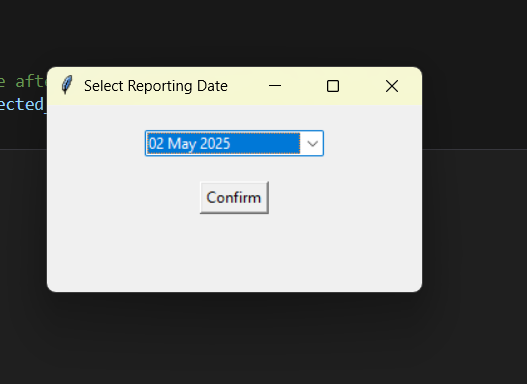

Data for 02 May 2025: [(17, '2025-04-24', '2025-05-01', 17, 202517, '24 Apr - 30 Apr', '24 Apr 2025 - 01 May 2025', '202517 - 24 Apr 2025 - 01 May 2025', '17 Apr - 23 Apr', '01 May - 07 May', '02 May 2025')]
Selected date: 02 May 2025

In [ ]:
print(selected_reporting_date)

02 May 2025

In [ ]:
str_ReportingDate = selected_reporting_date
datetime_ReportingDate = datetime.strptime(selected_reporting_date, '%d %b %Y').date()
formatted_ReportingDate = datetime_ReportingDate.strftime('%d %m %Y')

RunDate = datetime_ReportingDate - timedelta(days=1)
formatted_RunDate = f"{RunDate .day:02d} {RunDate .month:02d} {RunDate .year}"

Designated_Filename = f"KIT 3 Online Reporting Data {formatted_RunDate}.xlsx"

In [ ]:
conn = sqlite3.connect(master_data_dir)
cursor = conn.cursor()

cursor.execute("SELECT * FROM MasterData WHERE ReportingDate = ?", (str_ReportingDate,))
row = cursor.fetchone()

if row:
    column_names = [description[0] for description in cursor.description]
    
    for key, value in zip(column_names, row):
        if key in ["StartDate", "EndDate", "ReportingDate"] and isinstance(value, str):
            # Convert string to datetime.date
            try:
                # For StartDate and EndDate, use ISO format (YYYY-MM-DD)
                if key in ["StartDate", "EndDate"]:
                    value = datetime.strptime(value, "%Y-%m-%d").date()
                else:
                    # ReportingDate is in 'dd MMM YYYY' format
                    value = datetime.strptime(value, "%d %b %Y").date()
            except ValueError:
                value = None  # Handle parsing error gracefully
        
    
        globals()[key] = value
        
        print(f"{key} = {value} ({type(value).__name__})")
else:
    print(f"No row found for ReportingDate = {formatted_ReportingDate}")

conn.close()

id = 17 (int)
StartDate = 2025-04-24 (date)
EndDate = 2025-05-01 (date)
WeekNumber = 17 (int)
YearWeek = 202517 (int)
CurrentSheetName = 24 Apr - 30 Apr (str)
CurrentPeriod = 24 Apr 2025 - 01 May 2025 (str)
PeriodName = 202517 - 24 Apr 2025 - 01 May 2025 (str)
PreviousSheetName = 17 Apr - 23 Apr (str)
NextSheetName = 01 May - 07 May (str)
ReportingDate = 2025-05-02 (date)

In [ ]:
YeakWeek = YearWeek
WeekNumber = WeekNumber
CurrentSheetName = CurrentSheetName
CurrentPeriod = CurrentPeriod
PeriodName = PeriodName
PreviousSheetName = PreviousSheetName
NextSheetName = NextSheetName
ReportingDate = ReportingDate

# REST

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


GOOGLE_SERVICE_ACCOUNT_FILE = os.getenv('SERVICE_ACCOUNT_FILE', gdrive_auth_dir) #os.path.join(script_dir, 'Data Supplied/GoogleAuth.json'))
logging.info(f"Attempting to use service account file: {GOOGLE_SERVICE_ACCOUNT_FILE}")
if not os.path.exists(GOOGLE_SERVICE_ACCOUNT_FILE):
    logging.error(f"Service account file not found: {GOOGLE_SERVICE_ACCOUNT_FILE}")
    raise FileNotFoundError(f"Service account file not found: {GOOGLE_SERVICE_ACCOUNT_FILE}")
logging.info("File found, proceeding with authentication...")

GMAIL_SERVICE_ACCOUNT_FILE = os.getenv('SERVICE_ACCOUNT_FILE', gmail_auth_dir) #os.path.join(script_dir, 'Data Supplied/GmailAuth.json'))
logging.info(f"Attempting to use service account file: {GMAIL_SERVICE_ACCOUNT_FILE}")
if not os.path.exists(GMAIL_SERVICE_ACCOUNT_FILE):
    logging.error(f"Service account file not found: {GMAIL_SERVICE_ACCOUNT_FILE}")
    raise FileNotFoundError(f"Service account file not found: {GMAIL_SERVICE_ACCOUNT_FILE}")
logging.info("File found, proceeding with authentication...")


def authenticate_gsheets(return_gspread=False):
    """
    Authenticate using google-auth for gspread or Google Sheets API.
    """
    try:
        SCOPES = [
            "https://spreadsheets.google.com/feeds",
            "https://www.googleapis.com/auth/drive",
            "https://www.googleapis.com/auth/spreadsheets"
        ]
        creds = Credentials.from_service_account_file(GOOGLE_SERVICE_ACCOUNT_FILE, scopes=SCOPES)
        if return_gspread:
            gc = gspread.authorize(creds)
            logging.debug("gspread authentication successful")
            return creds, gc
        else:
            sheets_service = build('sheets', 'v4', credentials=creds)
            logging.debug("Sheets API authentication successful")
            return creds, sheets_service
    except Exception as e:
        logging.error(f"Failed to authenticate with Google Sheets: {e}")
        raise

def authenticate_gdrive():
    """
    Authenticate and return Google Drive API service.
    """
    try:
        SCOPES = ['https://www.googleapis.com/auth/drive']
        creds = Credentials.from_service_account_file(GOOGLE_SERVICE_ACCOUNT_FILE, scopes=SCOPES)
        gc = gspread.authorize(creds)
        drive_service = build('drive', 'v3', credentials=creds)
        logging.debug("Drive API authentication successful")
        return creds, gc, drive_service
    except Exception as e:
        logging.error(f"Failed to authenticate with Google Drive: {e}")
        raise

def execute_with_backoff(func,*args,max_retries=5,**kwargs):
    for attempt in range(max_retries):
        try:
            result=func(*args,**kwargs)
            if isinstance(result,HttpRequest):
                result=result.execute()
            return result
        except(HttpError,gspread.exceptions.APIError) as e:
            if 'Quota exceeded' in str(e) or getattr(e,'status',0)==429:
                if attempt==max_retries-1:
                    logging.error(f"Max retries reached for {func.__name__}: {e}")
                    raise
                sleep_time=(2**attempt)+(random.randint(0,1000)/1000)
                logging.warning(f"Quota exceeded, retrying in {sleep_time:.2f} seconds...")
                time.sleep(sleep_time)
            else:
                raise
        except Exception as e:
            logging.error(f"Unexpected error in {func.__name__}: {e}")
            raise

2025-05-23 10:22:03,078 - INFO - Attempting to use service account file: c:\Users\nicola\Desktop\VisualCode Workspace\Team Meeting Update\Background Data Folder\GoogleAuth.json
2025-05-23 10:22:03,078 - INFO - File found, proceeding with authentication...
2025-05-23 10:22:03,080 - INFO - Attempting to use service account file: c:\Users\nicola\Desktop\VisualCode Workspace\Team Meeting Update\Background Data Folder\GmailAuth.json
2025-05-23 10:22:03,080 - INFO - File found, proceeding with authentication...

In [ ]:
def clean_string(s):
    return str(s).strip().lower()


def extract_dates(text):
    match = re.search(r'(\d{1,2} \w{3}) \d{4} - (\d{1,2} \w{3}) \d{4}', text)
    if match:
        return f"{match.group(1)} - {match.group(2)}"
    return None  # or return text if no match is found


In [ ]:
def clients_df_to_custom_dict(df):
    result = {}
    for _, row in df.iterrows():
        values = []
        # Append non-null, non-empty values from Other1, Other2, and Other3
        for col in ['Other1', 'Other2', 'Other3']:
            if pd.notnull(row[col]) and row[col] != '':
                values.append(row[col])
        result[row['Client Name']] = values
    return result


In [ ]:
def fetch_client_names():
    try:
        _, gc, _ = authenticate_gdrive()
        spreadsheet = gc.open('Additional Data')
        sheet = spreadsheet.worksheet('Client Names Sheet')
        data = sheet.get_all_records()
        df = pd.DataFrame(data)
        df = df[~df['Other1'].isnull() & (df['Other1'].str.strip() != '')]  #ignore those for which no alternative name is listed
        ClientNames_dict = clients_df_to_custom_dict(df)
        return ClientNames_dict # return as dictionary 
    
    except Exception as e:
        logging.error(f"Failed to fetch Client Names Sheet: {e}")
        raise   

In [ ]:
def standardize_client_names(df, df_name):

    ClientNames_dict = fetch_client_names()
    Nonstrd_ClientNames_list = [item for value in ClientNames_dict.values() for item in (value if isinstance(value, (list, tuple)) else [value])]

    Nonstrd_ClientNames_list = [clean_string(i) for i in Nonstrd_ClientNames_list]
    def check_match(text):
        if pd.isna(text):  # Handle NaN/None values
            return False
        cleaned_text = clean_string(text)
        return cleaned_text in Nonstrd_ClientNames_list
    
    orginal_colname = df.columns[0]
    orginal_cols = list(df.columns)

    # Standardize column
    df = df.rename(columns={df.columns[0]: 'temp col'})
    # Add a new column 'Match' to the DataFrame
    df['Match'] = df['temp col'].apply(check_match)

    value_map = {}
    for key, values in ClientNames_dict.items():
        for value in values:
            value_map[clean_string(value)] = key
    
    # Function to apply to each row
    def get_standard_value(row):
        if row['Match']:  # If Match is True
            cleaned_col = clean_string(row['temp col'])
            return value_map.get(cleaned_col, row['temp col'])  # Return key if found, else original
        return row['temp col']  # Return original if Match is False
    
    # Add 'standard' column to DataFrame
    df['standard'] = df.apply(get_standard_value, axis=1)
    df = df.drop(columns=['temp col'])
    df = df.rename(columns={'standard': orginal_colname})
    df = df.reindex(columns=orginal_cols) # reorder
    print('Client Names standardized for {}'.format(df_name))
    
    return df

In [ ]:
def fetch_leave(reporting_date=ReportingDate):
    reporting_date = pd.Timestamp(reporting_date)
    try:
        _, gc, _ = authenticate_gdrive()
        spreadsheet = gc.open('Additional Data')
        sheet = spreadsheet.worksheet('Leave Sheet')
        data = pd.DataFrame(sheet.get_all_records())

        data['Leave - Start Date'] = pd.to_datetime(data['Leave - Start Date'], format="%d/%m/%Y", errors='coerce')
        data['Leave - End Date'] = pd.to_datetime(data['Leave - End Date'], format="%d/%m/%Y", errors='coerce')
        data['On Leave'] = False

        for index, row in data.iterrows():
            start = row['Leave - Start Date']
            end = row['Leave - End Date']

            if pd.notnull(start) and start < reporting_date <= end:
                data.at[index, 'On Leave'] = True
            elif pd.isnull(start) and pd.notnull(end) and end > reporting_date:
                data.at[index, 'On Leave'] = True

        return data
    except Exception as e:
        logging.error(f"Failed to fetch Leave Sheet: {e}")
        raise

In [ ]:
def fetch_kindle_employees():
    try:
        _, gc, _ = authenticate_gdrive()
        spreadsheet = gc.open('Additional Data')
        sheet = spreadsheet.worksheet('Person Responsible Sheet')
        data = sheet.get_all_records()
        data = pd.DataFrame(data)
        return data
    except Exception as e:
        logging.error(f"Failed to fetch Person Responsible Sheet: {e}")
        raise

In [ ]:
def determine_person_responsible(reporting_date=ReportingDate):
    reporting_date = pd.Timestamp(reporting_date)
    Employee_data = fetch_kindle_employees()
    LeaveStatus_data = fetch_leave(reporting_date)

    def determine_devs_turn(row):
        rotation_freq = row['Rotation Frequency (Weeks)']
        if pd.isna(rotation_freq) or rotation_freq == '':
        # Return Developer 1's name if valid, otherwise return empty string
            dev1 = row['Developer 1']
            if dev1 and dev1 != '?' and not pd.isna(dev1):
                return dev1.strip()
            return ''
    
        # Convert rotation_freq to an integer
        try:
            rotation_freq = int(rotation_freq)
        except (ValueError, TypeError):
            return ''
    
        if rotation_freq <= 0:
            return ''

        # Determine which developer columns to consider (Developer 1 to Developer n)
        developer_columns = ['Developer 1', 'Developer 2', 'Developer 3', 'Developer 4'][:rotation_freq]
    
        # Get the list of developers from the relevant columns
        developers = []
        for col in developer_columns:
            dev = row[col]
            if dev and dev != '?' and not pd.isna(dev):
            # Handle multiple developers in the same column (e.g., "Joel;Brendan")
                developers.extend([d.strip() for d in dev.split(';') if d.strip()])
    
        if not developers:
            return ''
    
        if not isinstance(WeekNumber, int):
            raise ValueError(f"current_week_number must be an integer, got {type(WeekNumber)}: {WeekNumber}")
    
        developer_index = (WeekNumber % rotation_freq) % len(developers)
    
        if not isinstance(developer_index, int):
            raise ValueError(f"developer_index is not an integer, got {type(developer_index)}: {developer_index}")
    
        return developers[developer_index]

    Employee_data['Developer'] = Employee_data.apply(determine_devs_turn, axis=1)

    on_leave_list = LeaveStatus_data.loc[LeaveStatus_data['On Leave'] == True, 'Kindle Employee'].dropna().tolist()

    def assign_functionalerror_reporter(row):
        dev = row['Developer']
        dev2 = row['Developer 2']
        dev3 = row['Developer 3']
        dev4 = row['Developer 4']
        emergency = row['In Case of Emergency']
    
        dev_on_leave = pd.notna(dev) and dev in on_leave_list
        dev2_on_leave = pd.notna(dev2) and dev2 in on_leave_list
        dev3_on_leave = pd.notna(dev3) and dev3 in on_leave_list
        dev4_on_leave = pd.notna(dev4) and dev4 in on_leave_list
    
        if pd.notna(dev) and not dev_on_leave:
            return dev
        elif pd.notna(dev2) and not dev2_on_leave:
            return dev2
        elif pd.notna(dev3) and not dev3_on_leave:
            return dev3
        elif pd.notna(dev4) and not dev4_on_leave:
            return dev4
        elif pd.notna(emergency):
            return emergency
        else:
            return None  # or raise an error if no responsible person can be assigned
        
    Employee_data['Functional Errors Reporter'] = Employee_data.apply(assign_functionalerror_reporter, axis=1)


    def assign_clientmovement_reporter(row):
        if row['Designated Reporter on Client Movement'] == 'Developer':
            return assign_functionalerror_reporter(row)

        if row['Designated Reporter on Client Movement'] == 'Business Analyst':
            ba1 = row['Business Analyst 1']
            ba2 = row['Business Analyst 2']
            emergency = row['In Case of Emergency']

            ba1_on_leave = pd.notna(ba1) and ba1 in on_leave_list
            ba2_on_leave = pd.notna(ba2) and ba2 in on_leave_list

            if pd.notna(ba1) and not ba1_on_leave:
                return ba1
            elif pd.notna(ba2) and not ba2_on_leave:
                return ba2
            elif pd.notna(emergency):
                return emergency
            else:
                return None  # or raise an error if no responsible person can be assigned

        return None  # If "Designated Reporter on Client Movement" is neither BA nor Developer

    
    Employee_data['Client Movement Reporter'] = Employee_data.apply(assign_clientmovement_reporter, axis=1)

    PersonsResponsible_data = Employee_data.drop(['Designated Reporter on Client Movement', 'Business Analyst 1', 'Business Analyst 2', 'Key Resource',
       'Developer 1', 'Developer 2', 'Developer 3', 'Developer 4',
       'Rotation Frequency (Weeks)', 'In Case of Emergency', 'Developer'], axis=1)
    
    PersonsResponsible_data = standardize_client_names(PersonsResponsible_data, 'PersonsResponsible_data')
    
    return PersonsResponsible_data

In [ ]:
def fetch_current_errors():
    try:
        _, gc, _ = authenticate_gdrive()
        spreadsheet = gc.open('ERROR REPORT Current Week')
        current_sheet = spreadsheet.worksheet(CurrentSheetName)
        data = current_sheet.get_all_records()
        return pd.DataFrame(data)
    except Exception as e:
        logging.error(f"Failed to fetch Sheet: {e}")
        raise

In [ ]:
def determine_error_count():
    pd.set_option('future.no_silent_downcasting', True)
    
    Current_Error_data = fetch_current_errors()
    Current_Error_data['Client'] = Current_Error_data['Client'].str.title()
    Current_Error_data['Client'] = Current_Error_data['Client'].replace('', np.nan)
    Current_Error_data['Period'] = Current_Error_data['Period'].replace('', np.nan)
    Current_Error_data['Client'] = Current_Error_data['Client'].ffill().bfill()
    Current_Error_data['Period'] = Current_Error_data['Period'].ffill().bfill()
    Current_Error_data = Current_Error_data.infer_objects(copy=False)
    Current_Error_data['Functional Error Y/N'] = Current_Error_data['Functional Error Y/N'].astype(str).str.strip().str.upper()

    Current_Error_grouped = Current_Error_data.groupby(['Client', 'Period', 'Functional Error Y/N'], as_index=False)['No of times error occurred'].sum()
    Current_Error_grouped.rename(columns={'No of times error occurred': 'Total Errors'}, inplace=True)

    Current_Error_grouped.rename(columns={'Functional Error Y/N': 'FunctionalError_Y/N'}, inplace=True)

    Current_ErrorCount_data = Current_Error_grouped.pivot_table(
        index=['Client', 'Period'],
        columns='FunctionalError_Y/N',
        values='Total Errors',
        aggfunc='sum',
        fill_value=0
        ).reset_index()
    Current_ErrorCount_data = Current_ErrorCount_data.infer_objects(copy=False)
    
    Current_ErrorCount_data.columns.name = None  # Remove the "FunctionalError_Y/N" header
    Current_ErrorCount_data = Current_ErrorCount_data.drop(columns=[''])

    Current_ErrorCount_data.rename(columns={'Y': 'FunctionalErrors', 'N': 'NonFunctionalErrors'}, inplace=True)

    Current_ErrorCount_data = standardize_client_names(Current_ErrorCount_data, 'Current_ErrorCount_data')

    return Current_ErrorCount_data

In [ ]:
def fetch_client_movement():
    """
    remove all rows after the row where 'Tenant Name' has 'Total'
    """
    try:
        _, gc, _ = authenticate_gdrive()
        spreadsheet = gc.open('Weekly Movement')
        sheet = spreadsheet.worksheet('Export')
        
        data = sheet.get_all_records()
        
        ClientMovement_data = pd.DataFrame(data[1:], columns=data[0])

        if 'Tenant Name' in ClientMovement_data.columns:
            total_index = ClientMovement_data[ClientMovement_data['Tenant Name'].str.contains('Total', na=False)].index
            if not total_index.empty:
                ClientMovement_data = ClientMovement_data.loc[:total_index[0]-1]

        ClientMovement_data = standardize_client_names(ClientMovement_data, 'ClientMovement_data')

        return ClientMovement_data

    except Exception as e:
        logging.error(f"Failed to fetch Client Movement: {e}")
        raise


In [ ]:
PersonsResponsible_data = determine_person_responsible()
BAResponsible_data = PersonsResponsible_data[['Clients','Client Movement Reporter']].rename(columns={'Clients':'Tenant Name'})
DEVResponsible_data = PersonsResponsible_data[['Clients','Functional Errors Reporter']].rename(columns={'Clients':'Company'})

2025-05-23 10:24:17,740 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:24:22,148 - INFO - file_cache is only supported with oauth2client<4.0.0
Client Names standardized for PersonsResponsible_data

In [ ]:
ClientMovement_data = fetch_client_movement()
Onlines_data = pd.merge(ClientMovement_data, BAResponsible_data, on='Tenant Name', how='left')
Onlines_data.loc[Onlines_data['Difference'] <= 0, 'Client Movement Reporter'] = np.nan

try:
    _, gc, _ = authenticate_gdrive()
    spreadsheet = gc.open('Persons Responsible')

    worksheet_title = 'Onlines'
    try:
        sheet = spreadsheet.worksheet(worksheet_title)
    except gspread.exceptions.WorksheetNotFound:
        sheet = spreadsheet.add_worksheet(title=worksheet_title, rows=100, cols=26)
        logging.info(f"Created new worksheet: {worksheet_title}")

    data = [Onlines_data.columns.tolist()] + Onlines_data.astype(object).where(pd.notnull(Onlines_data), None).values.tolist()

    # Clear sheet data    
    execute_with_backoff(sheet.clear)
    execute_with_backoff(sheet.update, data, 'A1', value_input_option='RAW')

    # Format the data as a table
    set_column_width(sheet, 'A', 250)  
    set_column_width(sheet, 'F', 100) 
    set_column_width(sheet, 'G', 150) 

    num_rows = len(data)
    num_cols = len(data[0])
    range_notation = f'A1:{chr(65 + num_cols - 1)}{num_rows}'

    # Set header row height using batch update
    spreadsheet.batch_update({
            "requests": [
                {
                    "updateDimensionProperties": {
                        "range": {
                            "sheetId": sheet.id,
                            "dimension": "ROWS",
                            "startIndex": 0,  # Row 1 (0-based index)
                            "endIndex": 1     # Only the first row
                        },
                        "properties": {
                            "pixelSize": 30  # Set height to 30 pixels
                        },
                        "fields": "pixelSize"
                    }
                }
            ]
        })

    # Bold headers and format
    format_cell_range(
            sheet,
            f'A1:{chr(65 + num_cols - 1)}1',
            CellFormat(
                textFormat=TextFormat(bold=True),
                horizontalAlignment='CENTER',
                verticalAlignment='MIDDLE',
                backgroundColor=Color(0.9, 0.9, 0.9)  # Light gray background for headers
            )
        )

    # Add borders to create a table effect
    format_cell_range(
            sheet,
            range_notation,
            CellFormat(
                borders=Borders(
                    top=Border('SOLID'),
                    bottom=Border('SOLID'),
                    left=Border('SOLID'),
                    right=Border('SOLID')
                )
            )
        )

    # Add filter buttons to the table
    spreadsheet.batch_update({
            "requests": [
                {
                    "setBasicFilter": {
                        "filter": {
                            "range": {
                                "sheetId": sheet.id,
                                "startRowIndex": 0,  # Start at row 1
                                "endRowIndex": num_rows,  # End at last row
                                "startColumnIndex": 0,  # Start at column A
                                "endColumnIndex": num_cols  # End at last column
                            }
                        }
                    }
                }
            ]
        })

    logging.info(f"Data successfully added to {worksheet_title} worksheet of Persons Responsible workbook")
except Exception as e:
    logging.error(f"Failed to write DataFrame to sheet, apply formatting, or add filter: {e}")
    raise

2025-05-23 10:25:19,676 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:25:24,716 - INFO - file_cache is only supported with oauth2client<4.0.0
Client Names standardized for ClientMovement_data
2025-05-23 10:25:36,602 - INFO - Data successfully added to Onlines worksheet of Persons Responsible workbook

In [ ]:
Current_ErrorCount_data = determine_error_count()
Current_ErrorCount_data = Current_ErrorCount_data.rename(columns={'Client': 'Company'}) 
Current_ErrorCount_data = Current_ErrorCount_data.drop(['Period'], axis=1)
FunctionalErrors_data = pd.merge(Current_ErrorCount_data, DEVResponsible_data, on='Company', how='left')
FunctionalErrors_data.loc[FunctionalErrors_data['FunctionalErrors'] > 0, 'Functional Errors Reporter'] = np.nan

try:
    _, gc, _ = authenticate_gdrive()
    spreadsheet = gc.open('Persons Responsible')

    # Check if worksheet exists, create if it doesn't
    worksheet_title = 'Functional Errors'
    try:
        sheet = spreadsheet.worksheet(worksheet_title)
    except gspread.exceptions.WorksheetNotFound:
        sheet = spreadsheet.add_worksheet(title=worksheet_title, rows=100, cols=26)
        logging.info(f"Created new worksheet: {worksheet_title}")

    data = [FunctionalErrors_data.columns.tolist()] + FunctionalErrors_data.astype(object).where(pd.notnull(FunctionalErrors_data), None).values.tolist()
        
    # Clear the sheet and write the data
    execute_with_backoff(sheet.clear)
    execute_with_backoff(sheet.update, data, 'A1', value_input_option='RAW')

    # Format the data as a table
    set_column_width(sheet, 'A', 300)
    set_column_width(sheet, 'B', 50)  
    set_column_width(sheet, 'C', 50) 
    set_column_width(sheet, 'D', 150)
    num_rows = len(data)
    num_cols = len(data[0])
    range_notation = f'A1:{chr(65 + num_cols - 1)}{num_rows}'

    # Set header row height using batch update
    spreadsheet.batch_update({
            "requests": [
                {
                    "updateDimensionProperties": {
                        "range": {
                            "sheetId": sheet.id,
                            "dimension": "ROWS",
                            "startIndex": 0,  # Row 1 (0-based index)
                            "endIndex": 1     # Only the first row
                        },
                        "properties": {
                            "pixelSize": 30  # Set height to 30 pixels
                        },
                        "fields": "pixelSize"
                    }
                }
            ]
        })

    # Bold headers and format
    format_cell_range(
            sheet,
            f'A1:{chr(65 + num_cols - 1)}1',
            CellFormat(
                textFormat=TextFormat(bold=True),
                horizontalAlignment='CENTER',
                verticalAlignment='MIDDLE',
                backgroundColor=Color(0.9, 0.9, 0.9)  # Light gray background for headers
            )
        )

    # Add borders to create a table effect
    format_cell_range(
            sheet,
            range_notation,
            CellFormat(
                borders=Borders(
                    top=Border('SOLID'),
                    bottom=Border('SOLID'),
                    left=Border('SOLID'),
                    right=Border('SOLID')
                )
            )
        )


    # Add filter buttons to the table
    spreadsheet.batch_update({
            "requests": [
                {
                    "setBasicFilter": {
                        "filter": {
                            "range": {
                                "sheetId": sheet.id,
                                "startRowIndex": 0,  # Start at row 1
                                "endRowIndex": num_rows,  # End at last row
                                "startColumnIndex": 0,  # Start at column A
                                "endColumnIndex": num_cols  # End at last column
                            }
                        }
                    }
                }
            ]
        })

    logging.info(f"Data sucessfully added to {worksheet_title} worksheet of Persons Responsible workbook")
except Exception as e:
    logging.error(f"Failed to write DataFrame to sheet, apply formatting, or add filter: {e}")
    raise


2025-05-23 10:25:36,631 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:25:41,419 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:25:45,811 - INFO - file_cache is only supported with oauth2client<4.0.0
Client Names standardized for Current_ErrorCount_data
2025-05-23 10:25:56,694 - INFO - Data sucessfully added to Functional Errors worksheet of Persons Responsible workbook

In [ ]:
def write_data_to_sheet(data, sheet_name):
    try:
        _, gc, _ = authenticate_gdrive()
        spreadsheet = gc.open('KIT 3 Online Reporting Data')

        worksheet_title = sheet_name
        try:
            sheet = spreadsheet.worksheet(worksheet_title)
        except gspread.exceptions.WorksheetNotFound:
            sheet = spreadsheet.add_worksheet(title=worksheet_title, rows=100, cols=26)  
            logging.info(f"Created new worksheet: {worksheet_title}")

        data_filled = data.copy()

        for col in data_filled.columns:
            if data_filled[col].dtype == 'Float64':
                data_filled[col] = data_filled[col].fillna(0)
            else:
                data_filled[col] = data_filled[col].fillna('')

        # Convert DataFrame to list for writing to sheet
        data = [data_filled.columns.tolist()] + data_filled.astype(object).where(pd.notnull(data_filled), None).values.tolist()

        # Clear the sheet and write the data
        execute_with_backoff(sheet.clear)
        execute_with_backoff(sheet.update, data, 'A1', value_input_option='RAW')

        # Format the data as a table
        num_rows = len(data)
        num_cols = len(data[0])
        range_notation = f'A1:{chr(65 + num_cols - 1)}{num_rows}'

        # Set header row height using batch update
        spreadsheet.batch_update({
            "requests": [
                {
                    "updateDimensionProperties": {
                        "range": {
                            "sheetId": sheet.id,
                            "dimension": "ROWS",
                            "startIndex": 0,  # Row 1 (0-based index)
                            "endIndex": 1     # Only the first row
                        },
                        "properties": {
                            "pixelSize": 30  # Set height to 30 pixels
                        },
                        "fields": "pixelSize"
                    }
                }
            ]
        })

        # Bold headers and format
        format_cell_range(
            sheet,
            f'A1:{chr(65 + num_cols - 1)}1',
            CellFormat(
                textFormat=TextFormat(bold=True),
                horizontalAlignment='CENTER',
                verticalAlignment='MIDDLE',
                backgroundColor=Color(0.9, 0.9, 0.9)  # Light gray background for headers
            )
        )

        # Add borders to create a table effect
        format_cell_range(
            sheet,
            range_notation,
            CellFormat(
                borders=Borders(
                    top=Border('SOLID'),
                    bottom=Border('SOLID'),
                    left=Border('SOLID'),
                    right=Border('SOLID')
                )
            )
        )

        # Auto-resize columns for better readability
        spreadsheet.batch_update({
            "requests": [
                {
                    "autoResizeDimensions": {
                        "dimensions": {
                            "sheetId": sheet.id,
                            "dimension": "COLUMNS",
                            "startIndex": 0,
                            "endIndex": num_cols
                        }
                    }
                }
            ]
        })

        # Add filter buttons to the table
        spreadsheet.batch_update({
            "requests": [
                {
                    "setBasicFilter": {
                        "filter": {
                            "range": {
                                "sheetId": sheet.id,
                                "startRowIndex": 0,  # Start at row 1
                                "endRowIndex": num_rows,  # End at last row
                                "startColumnIndex": 0,  # Start at column A
                                "endColumnIndex": num_cols  # End at last column
                            }
                        }
                    }
                }
            ]
        })

        logging.info(f"Overwrote {len(data)} rows in {sheet}, formatted as a table, and added filter buttons")
        return
    except Exception as e:
        logging.error(f"Failed to write DataFrame to sheet, apply formatting, or add filter: {e}")
        raise

In [ ]:
write_data_to_sheet(data=Current_ErrorCount_data, sheet_name='Errors Report')

2025-05-23 10:26:27,085 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:26:39,643 - INFO - Overwrote 26 rows in <Worksheet 'Errors Report' id:616973951>, formatted as a table, and added filter buttons

In [ ]:
try:
    _, gc, _ = authenticate_gdrive()
    spreadsheet = gc.open('KIT 3 Online Reporting Data')

    data_sheet = spreadsheet.worksheet('Data Errors and Reponse Times')

    pivot_sheet_title = 'Errors Report'

    chart_name = f'Error Count for {PeriodName}'

    pivot_sheet = spreadsheet.worksheet(pivot_sheet_title)

    _ , sheets_service = authenticate_gsheets()
    
    sheet_id = spreadsheet.id
    pivot_sheet_id = pivot_sheet.id

    chart_request = {
            "requests": [
                {
                    "addChart": {
                        "chart": {
                            "spec": {
                                "basicChart": {
                                    "chartType": "COLUMN",
                                    "legendPosition": "BOTTOM_LEGEND",
                                    "axis": [
                                        {
                                            "position": "BOTTOM_AXIS",
                                            "title": "Company"
                                        },
                                        {
                                            "position": "LEFT_AXIS",
                                            "title": "Error Count"
                                        }
                                    ],
                                    "domains": [
                                        {
                                            "domain": {
                                                "sourceRange": {
                                                    "sources": [
                                                        {
                                                            "sheetId": pivot_sheet_id,
                                                            "startRowIndex": 1,
                                                            "startColumnIndex": 0,
                                                            "endColumnIndex": 1
                                                        }
                                                    ]
                                                }
                                            }
                                        }
                                    ],
                                    "series": [
                                        {
                                            "series": {
                                                "sourceRange": {
                                                    "sources": [
                                                        {
                                                            "sheetId": pivot_sheet_id,
                                                            "startRowIndex": 1,
                                                            "startColumnIndex": 1,
                                                            "endColumnIndex": 2
                                                        }
                                                    ]
                                                }
                                            }
                                        },
                                        {
                                            "series": {
                                                "sourceRange": {
                                                    "sources": [
                                                        {
                                                            "sheetId": pivot_sheet_id,
                                                            "startRowIndex": 1,
                                                            "startColumnIndex": 2,
                                                            "endColumnIndex": 3
                                                        }
                                                    ]
                                                }
                                            }
                                        }
                                    ]
                                },
                                "title": chart_name
                            },
                            "position": {
                                "overlayPosition": {
                                    "anchorCell": {
                                        "sheetId": pivot_sheet_id,
                                        "rowIndex": 0,
                                        "columnIndex": 5
                                    },
                                    "offsetXPixels": 0,
                                    "offsetYPixels": 0,
                                    "widthPixels": 600,
                                    "heightPixels": 400
                                }
                            }
                        }
                    }
                }
            ]
        }
        
    # Execute chart creation
    sheets_service.spreadsheets().batchUpdate(spreadsheetId=sheet_id, body=chart_request).execute()
    logging.info("Added grouped bar chart to 'Errors Report' sheet")

    # Auto-resize columns in the pivot sheet
    spreadsheet.batch_update({
            "requests": [
                {
                    "autoResizeDimensions": {
                        "dimensions": {
                            "sheetId": pivot_sheet_id,
                            "dimension": "COLUMNS",
                            "startIndex": 0,
                            "endIndex": 10
                        }
                    }
                }
            ]
        })

except Exception as e:
    logging.error(f"Failed to create chart: {e}")
    raise

2025-05-23 10:26:52,801 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:26:56,296 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:26:59,726 - INFO - Added grouped bar chart to 'Errors Report' sheet

In [ ]:
def fetch_previous(YearWeek=YearWeek): 
    engine = create_engine(f'sqlite:///{previous_data_dir}')
    query = f"""
        SELECT * FROM PreviousErrorData
        WHERE CAST(SUBSTR(Period, 1, 6) AS INTEGER) < {YearWeek}
            """
    Previous_Errors_n_ResponseTimes_data = pd.read_sql(query, engine)
    Previous_Errors_n_ResponseTimes_data = standardize_client_names(Previous_Errors_n_ResponseTimes_data,'Previous_Errors_n_ResponseTimes_data')
    
    return Previous_Errors_n_ResponseTimes_data

In [ ]:
def fetch_response_times(data_folder = data_supplied_dir): # change to allow user input 

    files = os.listdir(data_folder)
    matched_file = None
    for file in files:
        if clean_string(file) == clean_string(Designated_Filename):
            matched_file = file
            break

    if not matched_file:
        available_files = ", ".join(files)
        raise FileNotFoundError(f"File '{Designated_Filename}' not found. Available files: {available_files}")

    file_path = os.path.join(data_folder, matched_file)

    try:
        xl = pd.ExcelFile(file_path)
    except Exception as e:
        raise Exception(f"File found but couldn't be accessed: {str(e)}")

    sheet_name = "This week response times"
    if sheet_name not in xl.sheet_names:
        sheet_name = xl.sheet_names[1]  # Default to last sheet

    try:
        data = xl.parse(sheet_name, header=0)
    except Exception as e:
        raise Exception(f"No valid data found in the '{sheet_name}' sheet: {str(e)}")

    Current_ResponseTimes_data  = standardize_client_names(data, 'Current_ResponseTimes_data')
    Current_ResponseTimes_data = Current_ResponseTimes_data.drop(['FunctionalError', 'NonFunctionalError'], axis=1)
    
    #Current_ResponseTimes_data.to_excel("ResponseTimesQuery.xlsx", index=False)

    return Current_ResponseTimes_data

In [ ]:
def concat_errors_n_responsetimes():
    """
    remove total row of response times
    """
    Current_ResponseTimes_data = fetch_response_times()
    Current_ResponseTimes_data = Current_ResponseTimes_data[~Current_ResponseTimes_data['Period'].isna()] 
    
    Current_ErrorCount_data = determine_error_count()

    Current_ErrorCount_data = Current_ErrorCount_data.rename(columns={'Client': 'Company'}) 
    Current_ErrorCount_data = Current_ErrorCount_data.drop(['Period'], axis=1)

    Current_Errors_n_ResponseTimes_data = pd.merge(Current_ResponseTimes_data, Current_ErrorCount_data, on=['Company'], how='left')
    
    columns_to_convert = ['FunctionalErrors', 'NonFunctionalErrors']
    for col in columns_to_convert:
        Current_Errors_n_ResponseTimes_data[col] = pd.to_numeric(Current_Errors_n_ResponseTimes_data[col], errors='coerce').astype('Int64')
    

    if Current_Errors_n_ResponseTimes_data.duplicated(subset=['Period', 'Company']).any():
        print("Warning: Removing internal duplicates based on Period and Company.")
        Current_Errors_n_ResponseTimes_data = Current_Errors_n_ResponseTimes_data.drop_duplicates(subset=['Period', 'Company'])

    engine = create_engine(f'sqlite:///{previous_data_dir}', echo=True)

    try:
        with engine.connect() as conn:
            # Get the last entry's Period from PreviousErrorData (most recent by Period)
            last_entry = pd.read_sql("SELECT Period FROM PreviousErrorData ORDER BY Period DESC LIMIT 1", conn)
        
            if last_entry.empty:
                print("Warning: PreviousErrorData table is empty. Cannot verify Period.")
            else:
                last_period = last_entry['Period'].iloc[0]
                last_period_prefix = int(last_period[:6])

                # Get the Period prefix from ErrorReport_data (assuming all rows have the same prefix)
                new_period_prefix = int(Current_ErrorCount_data['Period'].iloc[0][:6])  # First 6 characters

                # Verify that the new year is exactly one more than the last year
                if new_period_prefix == last_period_prefix + 1:
                    print(f"Verification successful: New Period ({new_period_prefix}) is one week after last Period ({last_period_prefix}).")
                else:
                    print(f"Verification failed: New Period ({new_period_prefix}) is not one more than last Period ({last_period_prefix}).")
    except Exception as e:
        print(f"Error during verification: {e}")

    
    try:
        with engine.connect() as conn:
            existing_records = pd.read_sql("SELECT Period, Company FROM PreviousErrorData", conn)

            # Ensure consistent data types for comparison
            for df in [Current_Errors_n_ResponseTimes_data, existing_records]:
                df['Period'] = df['Period'].astype(str)
                df['Company'] = df['Company'].astype(str)

            new_records = Current_Errors_n_ResponseTimes_data.merge(
                existing_records,
                on=['Period', 'Company'],
                how='left',
                indicator=True
            ).query('_merge == "left_only"').drop(columns='_merge')

            if new_records.empty:
                print("No new records to append; all records already exist in PreviousErrorData.")
            else:
                new_records.to_sql('PreviousErrorData', con=engine, if_exists='append', index=False)
                print(f"Successfully appended {len(new_records)} new records to PreviousErrorData table.")
                print("Appended records:")
                print(new_records[['Period', 'Company']])
    except Exception as e:
        print(f"Error checking/appending data: {e}")

    Previous_Errors_n_ResponseTimes_data = fetch_previous()

    Updated_Errors_n_ResponseTimes_data = pd.concat([Previous_Errors_n_ResponseTimes_data, Current_Errors_n_ResponseTimes_data], ignore_index=True)

    return Updated_Errors_n_ResponseTimes_data

In [ ]:
Updated_Errors_n_ResponseTimes_data = concat_errors_n_responsetimes()
Updated_Errors_n_ResponseTimes_data = Updated_Errors_n_ResponseTimes_data.where(pd.notnull(Updated_Errors_n_ResponseTimes_data), None)

ClientNames_dict = fetch_client_names()

Nonstrd_ClientNames_list = [item for value in ClientNames_dict.values() for item in (value if isinstance(value, (list, tuple)) else [value])]
if not Updated_Errors_n_ResponseTimes_data['Company'].isin(Nonstrd_ClientNames_list).any():
    print("No non-standard company names found.")
else:
    print("There is at least one non-standard company name present.")

2025-05-23 10:32:02,378 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-05-23 10:32:02,378 - INFO - [raw sql] ()
No new records to append; all records already exist in PreviousErrorData.
2025-05-23 10:32:02,406 INFO sqlalchemy.engine.Engine ROLLBACK
2025-05-23 10:32:02,406 - INFO - ROLLBACK
2025-05-23 10:32:02,433 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:32:06,979 - INFO - file_cache is only supported with oauth2client<4.0.0
Client Names standardized for Previous_Errors_n_ResponseTimes_data
No non-standard company names found.

In [ ]:
write_data_to_sheet(data=Updated_Errors_n_ResponseTimes_data, sheet_name='Data Errors and Reponse Times')

2025-05-23 10:32:30,589 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:32:41,065 - INFO - Overwrote 5057 rows in <Worksheet 'Data Errors and Reponse Times' id:1289794990>, formatted as a table, and added filter buttons

In [ ]:
SPREADSHEET_ID = os.getenv('SPREADSHEET_ID', '1m49V3mKZiuTatraSSGqo1xHLIhcQRmJZO90S4Y72vcc') # CURRENT
DEST_SPREADSHEET_ID = os.getenv('DEST_SPREADSHEET_ID', '1oc1zL7BdlRFFT68cZV46ctvHi5q-ZosaPk79HvireWI') # KIT 3 ONLINE REPORT

_, gc = authenticate_gsheets(return_gspread=True)
_, sheets_service = authenticate_gsheets()

spreadsheet = execute_with_backoff(gc.open_by_key, SPREADSHEET_ID)
dest_spreadsheet = execute_with_backoff(gc.open_by_key, DEST_SPREADSHEET_ID)

source_worksheets = execute_with_backoff(spreadsheet.worksheets)
dest_worksheets = execute_with_backoff(dest_spreadsheet.worksheets)

source_worksheet_ids = {sheet.title: sheet.id for sheet in source_worksheets}
dest_worksheet_ids = {sheet.title: sheet.id for sheet in dest_worksheets}

source_sheet_name = CurrentSheetName  
dest_sheet_name = 'Current Week Error'

if source_sheet_name in source_worksheet_ids and source_sheet_name not in dest_worksheet_ids:
    
    copy_response = execute_with_backoff(
        sheets_service.spreadsheets().sheets().copyTo,
        spreadsheetId=SPREADSHEET_ID,
        sheetId=source_worksheet_ids[source_sheet_name],
        body={'destinationSpreadsheetId': DEST_SPREADSHEET_ID}
    )
    copied_sheet_id = copy_response['sheetId']
    logging.info(f"Copied sheet '{source_sheet_name}' to destination.")

    # Delete existing destination sheet if it exists
    if dest_sheet_name in dest_worksheet_ids:
        delete_request = {
            'requests': [{
                'deleteSheet': {
                    'sheetId': dest_worksheet_ids[dest_sheet_name]
                }
            }]
        }
        execute_with_backoff(
            sheets_service.spreadsheets().batchUpdate,
            spreadsheetId=DEST_SPREADSHEET_ID,
            body=delete_request
        )
        logging.info(f"Deleted existing sheet '{dest_sheet_name}' from destination.")

    # Rename the copied sheet and ensure it's not hidden
    rename_and_unhide_request = {
    'requests': [{
        'updateSheetProperties': {
            'properties': {
                'sheetId': copied_sheet_id,
                'title': dest_sheet_name,
                'hidden': False
            },
            'fields': 'title,hidden'
            }
        }]
    }

    execute_with_backoff(
    sheets_service.spreadsheets().batchUpdate,
    spreadsheetId=DEST_SPREADSHEET_ID,
    body=rename_and_unhide_request
    )
    logging.info(f"Renamed copied sheet to '{dest_sheet_name}' and ensured it is visible.")


    # Adjust column widths
    resize_columns_request = {
    'requests': [
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': 0,  # Column A
                    'endIndex': 1
                },
                'properties': {
                    'pixelSize': 170  # Slightly increased
                },
                'fields': 'pixelSize'
            }
        },
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': 1,  # Column B
                    'endIndex': 2
                },
                'properties': {
                    'pixelSize': 120  # Slightly increased
                },
                'fields': 'pixelSize'
            }
        },
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': 2,  # Column C
                    'endIndex': 3
                },
                'properties': {
                    'pixelSize': 400  # Significantly increased
                },
                'fields': 'pixelSize'
                }
            }
        ]
    }

    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=DEST_SPREADSHEET_ID,
        body=resize_columns_request
    )
    logging.info("Adjusted column widths for columns A, B (slightly), and C (significantly).")

else:
    logging.info(f"No sheet copied. Either '{source_sheet_name}' doesn't exist in source or '{dest_sheet_name}' already exists in destination.")

2025-05-23 10:32:52,321 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:32:59,196 - INFO - Copied sheet '24 Apr - 30 Apr' to destination.
2025-05-23 10:32:59,731 - INFO - Deleted existing sheet 'Current Week Error' from destination.
2025-05-23 10:33:00,263 - INFO - Renamed copied sheet to 'Current Week Error' and ensured it is visible.
2025-05-23 10:33:00,765 - INFO - Adjusted column widths for columns A, B (slightly), and C (significantly).

In [ ]:
SPREADSHEET_ID = os.getenv('SPREADSHEET_ID', '13IpNi1rFg8luMX8t_OlhCbAQcEhkZkZUmwFWP3C_8N8') # FOLLOW UP
DEST_SPREADSHEET_ID = os.getenv('DEST_SPREADSHEET_ID', '1oc1zL7BdlRFFT68cZV46ctvHi5q-ZosaPk79HvireWI') # KIT3 REPORT

_, gc = authenticate_gsheets(return_gspread=True)
_, sheets_service =  authenticate_gsheets()

spreadsheet = execute_with_backoff(gc.open_by_key, SPREADSHEET_ID)
dest_spreadsheet = execute_with_backoff(gc.open_by_key, DEST_SPREADSHEET_ID)

source_worksheets = execute_with_backoff(spreadsheet.worksheets)
dest_worksheets = execute_with_backoff(dest_spreadsheet.worksheets)

source_worksheet_ids = {sheet.title: sheet.id for sheet in source_worksheets}
dest_worksheet_ids = {sheet.title: sheet.id for sheet in dest_worksheets}

source_sheet_name = PreviousSheetName
dest_sheet_name = 'Feedback on Previous Week Error'

if source_sheet_name in source_worksheet_ids and source_sheet_name not in dest_worksheet_ids:
   
    copy_response = execute_with_backoff(
        sheets_service.spreadsheets().sheets().copyTo,
        spreadsheetId=SPREADSHEET_ID,
        sheetId=source_worksheet_ids[source_sheet_name],
        body={'destinationSpreadsheetId': DEST_SPREADSHEET_ID}
    )

    copied_sheet_id = copy_response['sheetId']
    logging.info(f"Copied sheet '{source_sheet_name}' to destination.")

    # Delete existing destination sheet if it exists
    if dest_sheet_name in dest_worksheet_ids:
        delete_request = {
            'requests': [{
                'deleteSheet': {
                    'sheetId': dest_worksheet_ids[dest_sheet_name]
                }
            }]
        }
        execute_with_backoff(
            sheets_service.spreadsheets().batchUpdate,
            spreadsheetId=DEST_SPREADSHEET_ID,
            body=delete_request
        )
        logging.info(f"Deleted existing sheet '{dest_sheet_name}' from destination.")

    # Rename the copied sheet and ensure it's not hidden
    rename_and_unhide_request = {
    'requests': [{
        'updateSheetProperties': {
            'properties': {
                'sheetId': copied_sheet_id,
                'title': dest_sheet_name,
                'hidden': False
            },
            'fields': 'title,hidden'
            }
        }]
    }

    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=DEST_SPREADSHEET_ID,
        body=rename_and_unhide_request
    )

    logging.info(f"Renamed copied sheet to '{dest_sheet_name}' and ensured it is visible.")

    # Adjust column widths
    resize_columns_request = {
    'requests': [
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': 0,  # Column A
                    'endIndex': 1
                },
                'properties': {
                    'pixelSize': 170  # Slightly increased
                },
                'fields': 'pixelSize'
            }
        },
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': 1,  # Column B
                    'endIndex': 2
                },
                'properties': {
                    'pixelSize': 120  # Slightly increased
                },
                'fields': 'pixelSize'
            }
        },
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': 2,  # Column C
                    'endIndex': 3
                },
                'properties': {
                    'pixelSize': 400  # Significantly increased
                },
                'fields': 'pixelSize'
                }
            }
        ]
    }

    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=DEST_SPREADSHEET_ID,
        body=resize_columns_request
    )
    
    logging.info("Adjusted column widths for columns A, B (slightly), and C (significantly).")

else:
    logging.info(f"No sheet copied. Either '{source_sheet_name}' doesn't exist in source or '{dest_sheet_name}' already exists in destination.")

2025-05-23 10:33:00,807 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:33:09,026 - INFO - Copied sheet '17 Apr - 23 Apr' to destination.
2025-05-23 10:33:09,525 - INFO - Deleted existing sheet 'Feedback on Previous Week Error' from destination.
2025-05-23 10:33:10,604 - INFO - Renamed copied sheet to 'Feedback on Previous Week Error' and ensured it is visible.
2025-05-23 10:33:11,717 - INFO - Adjusted column widths for columns A, B (slightly), and C (significantly).

# SEND EMAIL

In [ ]:
GMAIL_SCOPES = ['https://www.googleapis.com/auth/drive.readonly','https://www.googleapis.com/auth/gmail.send']

flow = InstalledAppFlow.from_client_secrets_file(gmail_auth_dir, GMAIL_SCOPES)
creds = flow.run_local_server(port=0)

drive_service = build('drive', 'v3', credentials=creds)
gmail_service = build('gmail', 'v1', credentials=creds)

# Spreadsheet ID
SPREADSHEET_ID = '1oc1zL7BdlRFFT68cZV46ctvHi5q-ZosaPk79HvireWI'
TO_EMAIL = 'nicola@kindle.co.za'

# Export Google Sheet as Excel
request = drive_service.files().export_media(fileId=SPREADSHEET_ID, mimeType='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

file_path = f'Reports Folder/{Designated_Filename}'
fh = io.FileIO(file_path, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while not done:
    status, done = downloader.next_chunk()

# Read file for attachment
with open(file_path, 'rb') as f:
    file_data = f.read()

# Build Email
message = EmailMessage()
message['To'] = TO_EMAIL
message['From'] = 'me'  
message['Subject'] = 'KIT3 Weekly Report {}'.format(formatted_ReportingDate)
message.set_content("Hi All,\n\n Please find attached.\n\n Regards")

message.add_attachment(
    file_data,
    maintype='application',
    subtype='vnd.openxmlformats-officedocument.spreadsheetml.sheet',
    filename= Designated_Filename
)

# Encode and send
encoded_message = base64.urlsafe_b64encode(message.as_bytes()).decode()
gmail_service.users().messages().send(
    userId='me',
    body={'raw': encoded_message}
).execute()

print("Email sent successfully.")

2025-05-23 10:33:41,505 - INFO - "GET /?state=UjhqBxphqpKDBF3IjRvUPufHot5gXS&code=4/0AUJR-x7MT2-LW92QhkUI6i1BJ1v5VE-ia-hpSwOAKL_eqBfCFOR9VN6GyM9TTivTvbTxzQ&scope=https://www.googleapis.com/auth/drive.readonly%20https://www.googleapis.com/auth/gmail.send HTTP/1.1" 200 65
2025-05-23 10:33:42,083 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:33:42,093 - INFO - file_cache is only supported with oauth2client<4.0.0
Email sent successfully.

<strong>failure</strong> need to re-auth each time

## FIX RE-AUTH OF GMAIL

In [ ]:
# Define scopes
GMAIL_SCOPES = ['https://www.googleapis.com/auth/gmail.send', 'https://www.googleapis.com/auth/drive.readonly']

TOKEN_FILE = os.path.join(data_supplied_dir, 'GmmailToken.json')
CREDENTIALS_FILE = gmail_auth_dir

# Initialize credentials
creds = None

# Try to load existing token
if os.path.exists(TOKEN_FILE):
    try:
        creds = UserCredentials.from_authorized_user_file(TOKEN_FILE, GMAIL_SCOPES)
        if not creds.valid and creds.expired and creds.refresh_token:
            creds.refresh(Request())
    except Exception as e:
        print(f"Invalid token file: {e}. Deleting it.")
        os.remove(TOKEN_FILE)

# If no valid credentials, initiate OAuth flow
if not creds or not creds.valid:
    try:
        flow = InstalledAppFlow.from_client_secrets_file(CREDENTIALS_FILE, GMAIL_SCOPES)
        creds = flow.run_local_server(port=0)
        # Save the new token
        with open(TOKEN_FILE, 'w') as token:
            token.write(creds.to_json())
    except Exception as e:
        print(f"Error during authentication: {e}")
        raise

print("Authentication complete.")

# Build services
drive_service = build('drive', 'v3', credentials=creds)
gmail_service = build('gmail', 'v1', credentials=creds)

# Spreadsheet ID and email details
SPREADSHEET_ID = '1oc1zL7BdlRFFT68cZV46ctvHi5q-ZosaPk79HvireWI'
TO_EMAIL = 'nicola@kindle.co.za'

# Ensure Reports Folder exists
os.makedirs('Reports Folder', exist_ok=True)

# Export Google Sheet as Excel
try:
    request = drive_service.files().export_media(
        fileId=SPREADSHEET_ID,
        mimeType='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet'
    )
    file_path = os.path.join(report_dir,Designated_Filename)  #f'Reports Folder/{Designated_Filename}'
    fh = io.FileIO(file_path, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while not done:
        status, done = downloader.next_chunk()
    print(f"File exported to {file_path}")
except Exception as e:
    print(f"Error exporting file: {e}")
    raise

# Read file for attachment
try:
    with open(file_path, 'rb') as f:
        file_data = f.read()
except Exception as e:
    print(f"Error reading file: {e}")
    raise

# Build Email
message = EmailMessage()
message['To'] = TO_EMAIL
message['From'] = 'me'
message['Subject'] = f'KIT3 Weekly Report {formatted_ReportingDate}'
message.set_content("Hi All,\n\nPlease find attached.\n\nRegards")

message.add_attachment(
    file_data,
    maintype='application',
    subtype='vnd.openxmlformats-officedocument.spreadsheetml.sheet',
    filename=Designated_Filename
)

# Encode and send
try:
    encoded_message = base64.urlsafe_b64encode(message.as_bytes()).decode()
    gmail_service.users().messages().send(
        userId='me',
        body={'raw': encoded_message}
    ).execute()
    print("Email sent successfully.")
except Exception as e:
    print(f"Error sending email: {e}")
    raise

<strong> FIRST TIME </strong> 


2025-05-23 10:37:25,342 - INFO - "GET /?state=EB0rz1mM7alD9qzMmkKwoQd8M4gBjm&code=4/0AUJR-x6uFkWXiKy2an_D1jf_QUPv_ArCVb0wYA7hH39PzmNQ6mhfcfGs1TEVaG_0NwifnA&scope=https://www.googleapis.com/auth/drive.readonly%20https://www.googleapis.com/auth/gmail.send HTTP/1.1" 200 65
2025-05-23 10:37:26,116 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:37:26,123 - INFO - file_cache is only supported with oauth2client<4.0.0
Authentication complete.
File exported to c:\Users\nicola\Desktop\VisualCode Workspace\Team Meeting Update\Reports Folder\Weekly_Report.xlsx
Email sent successfully.


<strong> THEREAFTER </strong>

Authentication complete.
File exported to c:\Users\nicola\Desktop\VisualCode Workspace\Team Meeting Update\Reports Folder\Weekly_Report.xlsx
Email sent successfully.

In [ ]:
# Hardcoded column widths (in pixels) for specific columns (0-based index)
COLUMN_WIDTHS = {
    0: 200,  # Column A
    1: 150,  # Column B
    2: 300,  # Column C
    3: 150,  # Column D
    4: 150, 
    5: 150, 
    6: 150, 
    7: 150, 
    8: 150,
    9: 150
}

CURRENT_SPREADSHEET_ID = os.getenv('CURRENT_SPREADSHEET_ID', '1m49V3mKZiuTatraSSGqo1xHLIhcQRmJZO90S4Y72vcc')  # CURRENT
FOLLOWUP_SPREADSHEET_ID = os.getenv('FOLLOWUP_SPREADSHEET_ID', '13IpNi1rFg8luMX8t_OlhCbAQcEhkZkZUmwFWP3C_8N8')  # FOLLOW UP
TEMPLATE_NAME = 'TEMPLATE - Do not edit'

_, gc = authenticate_gsheets(return_gspread=True)
_, sheets_service = authenticate_gsheets()

# Open spreadsheets
current_spreadsheet = execute_with_backoff(gc.open_by_key, CURRENT_SPREADSHEET_ID)
template_sheet = current_spreadsheet.get_worksheet_by_id(552319826)
followup_spreadsheet = execute_with_backoff(gc.open_by_key, FOLLOWUP_SPREADSHEET_ID)

# Cache worksheets to reduce API calls
current_worksheets = execute_with_backoff(current_spreadsheet.worksheets)
followup_worksheets = execute_with_backoff(followup_spreadsheet.worksheets)

current_worksheet_ids = {sheet.title: sheet.id for sheet in current_worksheets}
followup_worksheet_ids = {sheet.title: sheet.id for sheet in followup_worksheets}

# Define sheet names 
next_sheet_name = NextSheetName  
followup_sheet_name = CurrentSheetName  

# Step 1: Unhide the template sheet
if TEMPLATE_NAME in current_worksheet_ids:
    template_sheet_id = current_worksheet_ids[TEMPLATE_NAME]
    unhide_request = {
        'requests': [{
            'updateSheetProperties': {
                'properties': {
                    'sheetId': template_sheet_id,
                    'hidden': False
                },
                'fields': 'hidden'
            }
        }]
    }
    try:
        execute_with_backoff(
            sheets_service.spreadsheets().batchUpdate,
            spreadsheetId=CURRENT_SPREADSHEET_ID,
            body=unhide_request
        )
        logging.info(f"Unhid template sheet '{TEMPLATE_NAME}'.")
    except Exception as e:
        logging.error(f"Error unhiding template sheet '{TEMPLATE_NAME}': {e}")
        raise
else:
    logging.error(f"Template sheet '{TEMPLATE_NAME}' not found.")
    raise Exception(f"Template sheet '{TEMPLATE_NAME}' not found.")

if next_sheet_name in current_worksheet_ids:
    logging.info(f"Worksheet '{next_sheet_name}' already exists. Deleting it.")
    sheet_id = current_worksheet_ids[next_sheet_name]
    delete_request = {
        'requests': [{
            'deleteSheet': {
                'sheetId': sheet_id
            }
        }]
    }
    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=CURRENT_SPREADSHEET_ID,
        body=delete_request
    )
    
    try:   
        del current_worksheet_ids[next_sheet_name]
        time.sleep(1)
        updated_current_worksheets = execute_with_backoff(current_spreadsheet.worksheets)
        updated_current_worksheet_ids = {sheet.title: sheet.id for sheet in updated_current_worksheets}
        
        if next_sheet_name in updated_current_worksheet_ids:
            raise Exception(f"Failed to delete worksheet '{next_sheet_name}'.")
        logging.info(f"Deleted worksheet '{next_sheet_name}'.")
        
    except Exception as e:
        logging.error(f"Error deleting worksheet '{next_sheet_name}': {e}")
        raise

try:
    new_sheet = execute_with_backoff(
        current_spreadsheet.duplicate_sheet,
        source_sheet_id=template_sheet.id,
        new_sheet_name=next_sheet_name)
    
    current_worksheet_ids[next_sheet_name] = new_sheet.id
    
    logging.info(f"Created worksheet '{next_sheet_name}'.")

    # Set column widths for the new sheet
    width_requests = [
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': new_sheet.id,
                    'dimension': 'COLUMNS',
                    'startIndex': col_index,
                    'endIndex': col_index + 1
                },
                'properties': {
                    'pixelSize': width
                },
                'fields': 'pixelSize'
            }
        } for col_index, width in COLUMN_WIDTHS.items()
    ]
    if width_requests:
        execute_with_backoff(
            sheets_service.spreadsheets().batchUpdate,
            spreadsheetId=CURRENT_SPREADSHEET_ID,
            body={'requests': width_requests}
        )
        logging.info(f"Set column widths for '{next_sheet_name}'.")

    # Update 'Period' column
    values = execute_with_backoff(new_sheet.get_all_values)
    header = values[0]
    try:
        period_col_index = header.index("Period")
        period_col_letter = chr(ord('A') + period_col_index)
    except ValueError:
        raise Exception("Column 'Period' not found.")
    updates = [
        {'range': f"{period_col_letter}{row_idx}", 'values': [[next_sheet_name]]}
        for row_idx, row in enumerate(values[1:], start=2)
        if len(row) > period_col_index and row[period_col_index].strip()
    ]
    if updates:
        execute_with_backoff(new_sheet.batch_update, updates)
        logging.info(f"Updated {len(updates)} 'Period' cells.")

except Exception as e:
    logging.error(f"Error creating worksheet '{next_sheet_name}': {e}")
    raise

if followup_sheet_name in current_worksheet_ids and followup_sheet_name in followup_worksheet_ids:
    logging.info(f"Worksheet '{followup_sheet_name}' already exists. Deleting it.")
    sheet_id = followup_worksheet_ids[followup_sheet_name]
    delete_request = {
        'requests': [{
            'deleteSheet': {
                'sheetId': sheet_id
            }
        }]
    }
    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        body=delete_request
    )
    
    try:   
        del followup_worksheet_ids[followup_sheet_name]
        time.sleep(1)
        updated_followup_worksheets = execute_with_backoff(followup_spreadsheet.worksheets)
        updated_followup_worksheet_ids = {sheet.title: sheet.id for sheet in updated_followup_worksheets}
        
        if followup_sheet_name in updated_followup_worksheet_ids:
            raise Exception(f"Failed to delete worksheet '{followup_sheet_name}'.")
        logging.info(f"Deleted worksheet '{followup_sheet_name}'.")
        
    except Exception as e:
        logging.error(f"Error deleting worksheet '{followup_sheet_name}': {e}")
        raise

try:
    copy_response = execute_with_backoff(
        sheets_service.spreadsheets().sheets().copyTo,
        spreadsheetId=CURRENT_SPREADSHEET_ID,
        sheetId=current_worksheet_ids[followup_sheet_name],
        body={'destinationSpreadsheetId': FOLLOWUP_SPREADSHEET_ID})
        
    copied_sheet_id = copy_response['sheetId']
    rename_request = {
        'requests': [{
            'updateSheetProperties': {
                'properties': {
                    'sheetId': copied_sheet_id,
                    'title': followup_sheet_name
                },
                'fields': 'title'
            }
        }]
    }
    # Add column width updates to the rename request
    width_requests = [
        {
            'updateDimensionProperties': {
                'range': {
                    'sheetId': copied_sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': col_index,
                    'endIndex': col_index + 1
                },
                'properties': {
                    'pixelSize': width
                },
                'fields': 'pixelSize'
            }
        } for col_index, width in COLUMN_WIDTHS.items()
    ]
    rename_request['requests'].extend(width_requests)
    
    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        body=rename_request
    )
    
    followup_worksheet_ids[followup_sheet_name] = copied_sheet_id

    logging.info(f"Copied, renamed, and set column widths for sheet '{followup_sheet_name}'.")

except Exception as e:
    logging.error(f"Error copying sheet '{followup_sheet_name}': {e}")
    raise

2025-05-23 10:40:08,777 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:40:18,651 - INFO - Unhid template sheet 'TEMPLATE - Do not edit'.
2025-05-23 10:40:18,651 - INFO - Worksheet '01 May - 07 May' already exists. Deleting it.
2025-05-23 10:40:22,537 - INFO - Deleted worksheet '01 May - 07 May'.
2025-05-23 10:40:24,088 - INFO - Created worksheet '01 May - 07 May'.
2025-05-23 10:40:24,637 - INFO - Set column widths for '01 May - 07 May'.
2025-05-23 10:40:26,093 - INFO - Updated 25 'Period' cells.
2025-05-23 10:40:26,093 - INFO - Worksheet '24 Apr - 30 Apr' already exists. Deleting it.
2025-05-23 10:40:28,772 - INFO - Deleted worksheet '24 Apr - 30 Apr'.
2025-05-23 10:40:31,054 - INFO - Copied, renamed, and set column widths for sheet '24 Apr - 30 Apr'.

In [ ]:
def col_index_to_letter(index):
    result = ''
    index += 1
    while index:
        index, rem = divmod(index - 1, 26)
        result = chr(65 + rem) + result
    return result

In [ ]:
sheet_id = followup_worksheet_ids[followup_sheet_name]

try:
    # Step 1: Get sheet data to find the last column
    spreadsheet = execute_with_backoff(
        sheets_service.spreadsheets().get,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        ranges=[f"{followup_sheet_name}!A1:ZZ1"],
        includeGridData=True
    )

    sheet_data = next((s for s in spreadsheet['sheets'] if s['properties']['sheetId'] == sheet_id), None)
    if not sheet_data:
        raise Exception(f"Sheet '{followup_sheet_name}' not found in spreadsheet.")

    new_column_index = 10  # Column K
    new_column_letter = 'K'

    # Step 2: Insert a new column
    insert_column_request = {
        'requests': [{
            'insertDimension': {
                'range': {
                    'sheetId': sheet_id,
                    'dimension': 'COLUMNS',
                    'startIndex': new_column_index,
                    'endIndex': new_column_index + 1
                },
                'inheritFromBefore': True
            }
        }]
    }
    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        body=insert_column_request
    )
    logging.info(f"Inserted new column at index {new_column_index} ({new_column_letter}) in '{followup_sheet_name}'.")

    # Step 3: Set the header to "Comments"
    execute_with_backoff(
        sheets_service.spreadsheets().values().update,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        range=f"{followup_sheet_name}!{new_column_letter}1",
        valueInputOption='RAW',
        body={'values': [['Comments']]}
    )
    logging.info(f"Set header 'Comments' in column {new_column_letter} of '{followup_sheet_name}'.")

    # Step 4: Get formatting from column F (entire column)
    formatting_response = execute_with_backoff(
        sheets_service.spreadsheets().get,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        ranges=[f"{followup_sheet_name}!F:F"],
        fields='sheets.data.rowData.values.userEnteredFormat'
    )

    format_data = formatting_response['sheets'][0]['data'][0].get('rowData', [])
    if not format_data:
        logging.warning(f"No formatting data found for column F in '{followup_sheet_name}'. Applying default formatting.")
        column_format = {}
    else:
        column_format = format_data[0]['values'][0].get('userEnteredFormat', {}) if format_data[0].get('values') else {}

    formatting_requests = []
    # Copy formatting for each row in column F
    for row_index, row in enumerate(format_data):
        cell = row.get('values', [])
        row_format = cell[0].get('userEnteredFormat', column_format) if cell else column_format

        # Prepare the request to copy complete formatting including borders
        formatting_requests.append({
            'repeatCell': {
                'range': {
                    'sheetId': sheet_id,
                    'startRowIndex': row_index,
                    'endRowIndex': row_index + 1,
                    'startColumnIndex': new_column_index,
                    'endColumnIndex': new_column_index + 1
                },
                'cell': {
                    'userEnteredFormat': row_format
                },
                'fields': 'userEnteredFormat(backgroundColor,textFormat,borders,padding,horizontalAlignment,verticalAlignment,wrapStrategy,numberFormat)'
            }
        })

    # Apply all formatting requests in one batch
    if formatting_requests:
        execute_with_backoff(
            sheets_service.spreadsheets().batchUpdate,
            spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
            body={'requests': formatting_requests}
        )
        logging.info(f"Applied complete formatting including borders from column F to column K in '{followup_sheet_name}'.")
    else:
        logging.warning("No formatting data found in column F.")

except Exception as e:
    logging.error(f"Failed to add Comments column to '{followup_sheet_name}': {e}")
    raise

2025-05-23 10:41:11,586 - INFO - Inserted new column at index 10 (K) in '24 Apr - 30 Apr'.
2025-05-23 10:41:12,064 - INFO - Set header 'Comments' in column K of '24 Apr - 30 Apr'.
2025-05-23 10:41:14,906 - INFO - Applied complete formatting including borders from column F to column K in '24 Apr - 30 Apr'.

In [ ]:
def filter_hide_requests(worksheet_ids: Dict[str, int], sheets_to_keep_visible: List[str], spreadsheet_id: str) -> List[Dict[str, Any]]:
    gc, _ = authenticate_gsheets(return_gspread=True) 
    _, sheets_service = authenticate_gsheets() #build('sheets', 'v4', credentials=creds)
    
    try:
        metadata = execute_with_backoff(
            sheets_service.spreadsheets().get,
            spreadsheetId=spreadsheet_id,
            fields='sheets.properties'
        )
        logging.info(f"Metadata retrieved: {metadata.keys()}")
        current_sheets = metadata.get('sheets', [])

        hide_requests = []
        for sheet in current_sheets:
            properties = sheet.get('properties', {})
            title = properties.get('title')
            sheet_id = properties.get('sheetId')
            is_hidden = properties.get('hidden', False)

            if not title or sheet_id is None:
                logging.warning(f"Skipping invalid sheet: {properties}")
                continue

            if title not in sheets_to_keep_visible and not is_hidden:
                hide_requests.append({
                    "updateSheetProperties": {
                        "properties": {
                            "sheetId": sheet_id,
                            "hidden": True
                        },
                        "fields": "hidden"
                    }
                })

        total_sheets = len(current_sheets)
        if len(hide_requests) >= total_sheets:
            logging.warning(f"Prevented hiding all sheets in spreadsheet {spreadsheet_id}.")
            hide_requests = hide_requests[:-1] if hide_requests else []

        return hide_requests

    except Exception as e:
        logging.error(f"Failed to fetch or process current sheet visibility: {e}")
        raise



In [ ]:
current_visible_sheets = [next_sheet_name]
currentworksheet_requests = filter_hide_requests(current_worksheet_ids, current_visible_sheets, CURRENT_SPREADSHEET_ID)

if currentworksheet_requests :
    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=CURRENT_SPREADSHEET_ID,
        body={"requests": currentworksheet_requests }
    )
    logging.info(f"Hid {len(currentworksheet_requests )} sheets in current spreadsheet.")



2025-05-23 10:41:15,718 - INFO - file_cache is only supported with oauth2client<4.0.0
2025-05-23 10:41:18,536 - INFO - Metadata retrieved: dict_keys(['sheets'])
2025-05-23 10:41:19,128 - INFO - Hid 1 sheets in current spreadsheet.

In [ ]:
followup_visible_sheets = [followup_sheet_name]
followupworksheet_requests = filter_hide_requests(followup_worksheet_ids, followup_visible_sheets, FOLLOWUP_SPREADSHEET_ID)


if followupworksheet_requests :
    execute_with_backoff(
        sheets_service.spreadsheets().batchUpdate,
        spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
        body={"requests": followupworksheet_requests }
    )
    logging.info(f"Hid {len(followupworksheet_requests )} sheets in followup spreadsheet.")

---------------------------------------------------------------------------
HttpError                                 Traceback (most recent call last)
Cell In[60], line 6
      2 followupworksheet_requests = filter_hide_requests(followup_worksheet_ids, followup_visible_sheets, FOLLOWUP_SPREADSHEET_ID)
      5 if followupworksheet_requests :
----> 6     execute_with_backoff(
      7         sheets_service.spreadsheets().batchUpdate,
      8         spreadsheetId=FOLLOWUP_SPREADSHEET_ID,
      9         body={"requests": followupworksheet_requests }
     10     )
     11     logging.info(f"Hid {len(followupworksheet_requests )} sheets in followup spreadsheet.")

Cell In[11], line 62, in execute_with_backoff(func, max_retries, *args, **kwargs)
     60     result=func(*args,**kwargs)
     61     if isinstance(result,HttpRequest):
---> 62         result=result.execute()
     63     return result
     64 except(HttpError,gspread.exceptions.APIError) as e:

File c:\Users\nicola\Desktop\VisualCode Workspace\.venv\Lib\site-packages\googleapiclient\_helpers.py:130, in positional.<locals>.positional_decorator.<locals>.positional_wrapper(*args, **kwargs)
    128     elif positional_parameters_enforcement == POSITIONAL_WARNING:
    129         logger.warning(message)
--> 130 return wrapped(*args, **kwargs)

File c:\Users\nicola\Desktop\VisualCode Workspace\.venv\Lib\site-packages\googleapiclient\http.py:938, in HttpRequest.execute(self, http, num_retries)
    936     callback(resp)
    937 if resp.status >= 300:
--> 938     raise HttpError(resp, content, uri=self.uri)
    939 return self.postproc(resp, content)

HttpError: <HttpError 400 when requesting https://sheets.googleapis.com/v4/spreadsheets/13IpNi1rFg8luMX8t_OlhCbAQcEhkZkZUmwFWP3C_8N8:batchUpdate?alt=json returned "Invalid requests[30].updateSheetProperties: You can't hide all the sheets in a document.". Details: "Invalid requests[30].updateSheetProperties: You can't hide all the sheets in a document.">